In [1]:
import os
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
print(os.path.exists('signs'))

True


In [3]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/LENOVO/signs/Train')

Found 39209 files belonging to 43 classes.


In [4]:
data_iterator = data.as_numpy_iterator()


In [5]:
data_iterator 

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002092A714E10>)

In [6]:
batch = data_iterator.next()

In [7]:
batch

(array([[[[ 48.       ,  47.       ,  42.       ],
          [ 48.       ,  47.       ,  42.       ],
          [ 47.76758  ,  47.       ,  42.       ],
          ...,
          [240.16211  , 249.69727  , 253.23242  ],
          [239.       , 249.       , 253.       ],
          [239.       , 249.       , 253.       ]],
 
         [[ 48.       ,  47.       ,  42.       ],
          [ 48.       ,  47.       ,  42.       ],
          [ 47.76758  ,  47.       ,  42.       ],
          ...,
          [240.16211  , 249.69727  , 253.23242  ],
          [239.       , 249.       , 253.       ],
          [239.       , 249.       , 253.       ]],
 
         [[ 49.125    ,  48.125    ,  42.84375  ],
          [ 49.125    ,  48.125    ,  42.84375  ],
          [ 48.76184  ,  47.994263 ,  42.77838  ],
          ...,
          [240.67902  , 249.71704  , 252.90558  ],
          [239.84375  , 249.28125  , 253.       ],
          [239.84375  , 249.28125  , 253.       ]],
 
         ...,
 
         [[ 

In [8]:
len(batch)

2

In [9]:
batch[1]

array([ 1, 29,  1, 38,  9,  5, 12, 34, 12,  9,  9, 34,  5,  4,  6, 21, 12,
       38, 27, 14,  4, 39, 42,  4, 42,  4, 40,  4, 28,  7, 30,  4])

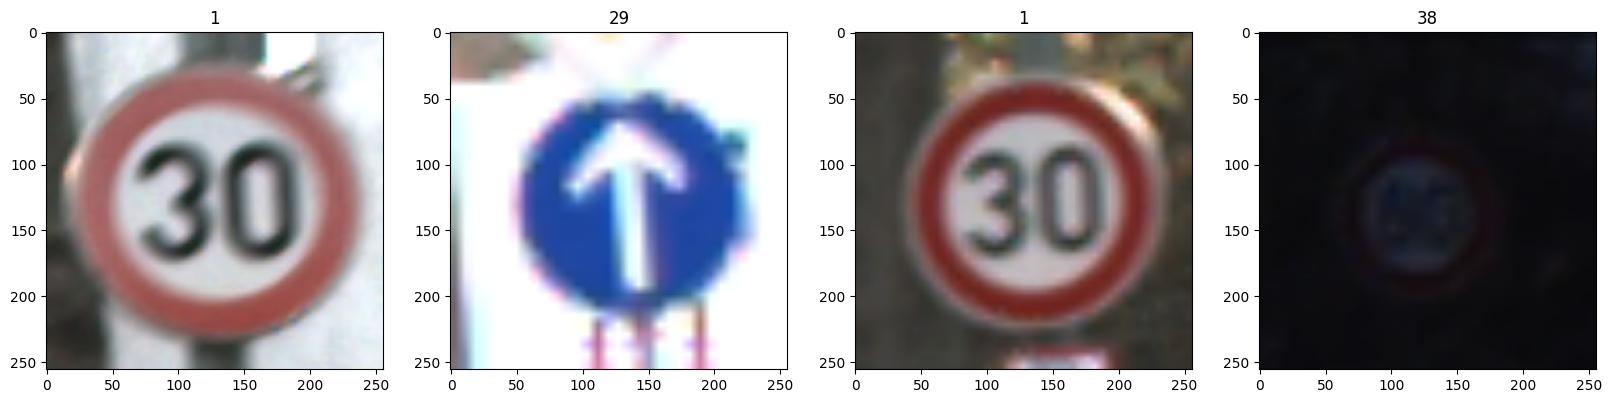

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing of data

In [11]:
#scale data
data = data.map(lambda x, y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()[0].max()

1.0

In [13]:
#split data
len(data)

1226

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [15]:
train_size+val_size+test_size 

1226

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
len(train)

858

## Deep Learning


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))

C:\deeplearning\imageClassification\imageClassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,707,419 (14.14 MB)

 Trainable params: 3,707,419 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 279s 323ms/step - accuracy: 0.5619 - loss: 1.5526 - val_accuracy: 0.8773 - val_loss: 0.4287
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 283s 330ms/step - accuracy: 0.9306 - loss: 0.2357 - val_accuracy: 0.9394 - val_loss: 0.2419
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 261s 303ms/step - accuracy: 0.9624 - loss: 0.1398 - val_accuracy: 0.9594 - val_loss: 0.1727
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 254s 296ms/step - accuracy: 0.9747 - loss: 0.0891 - val_accuracy: 0.9311 - val_loss: 0.2936
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 251s 293ms/step - accuracy: 0.9794 - loss: 0.0695 - val_accuracy: 0.9597 - val_loss: 0.1925
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 256s 298ms/step - accuracy: 0.9802 - loss: 0.0753 - val_accuracy: 0.9597 - val_loss: 0.1945
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 251s 293ms/step - accuracy: 0.9888 - loss: 0.0408 - val_accuracy: 0.9304 - val_loss: 0.2892
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 256s 298ms/step - accuracy: 0.9841 -

In [26]:
from tensorflow.keras.models import load_model


In [27]:
model.save(os.path.join('models', 'signs.keras'))

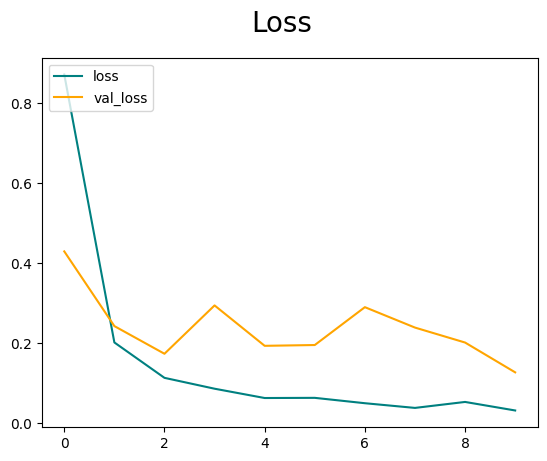

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

In [29]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

In [30]:
pre = Precision()
acc = Accuracy()
re = Recall()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = tf.argmax(model.predict(X), axis =1)
    pre.update_state(y, yhat)
    acc.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━

In [32]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9987176060676575, Recall: 1.0, Accuracy: 0.9782775640487671


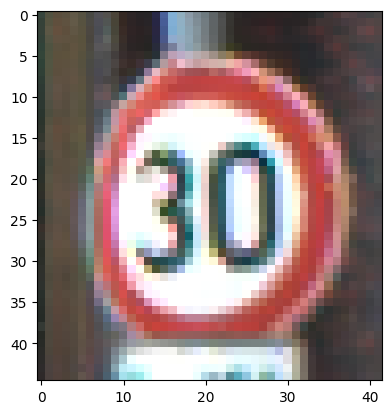

In [33]:
img = cv2.imread('test_1.png')

# Convert BGR to RGB for displaying in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(img_rgb)
plt.show()

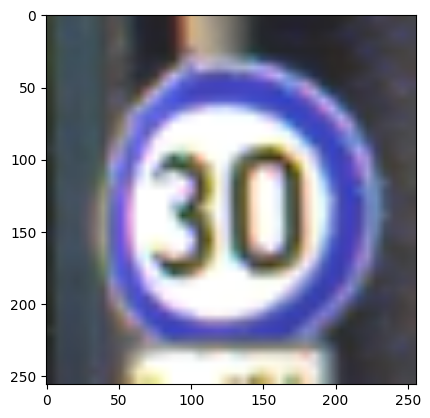

In [34]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = tf.argmax(model.predict(np.expand_dims(resize/255, 0)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [36]:
yhat.numpy()

array([39], dtype=int64)

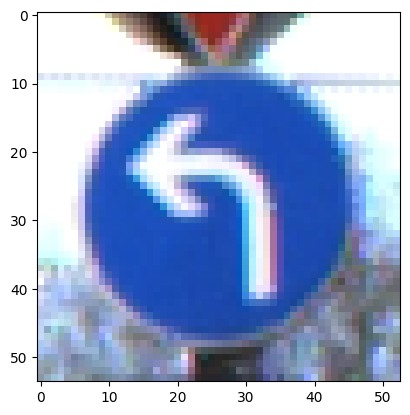

In [37]:
img_2 = cv2.imread('test_2.png')

# Convert BGR to RGB for displaying in matplotlib
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(img_rgb_2)
plt.show()

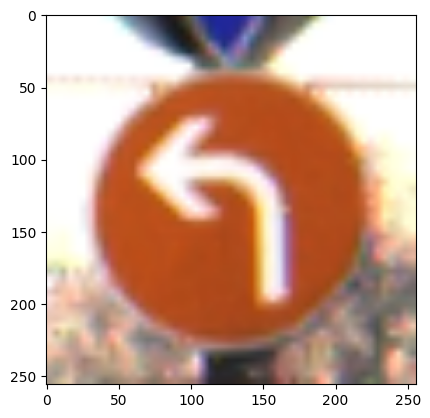

In [38]:
resize_2 = tf.image.resize(img_2, (256, 256))
plt.imshow(resize_2.numpy().astype(int))
plt.show()

In [39]:
yhat_2 = tf.argmax(model.predict(np.expand_dims(resize_2/255, 0)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [40]:
yhat_2.numpy()

array([6], dtype=int64)